<a href="https://colab.research.google.com/github/likhith-kumarn/Data_Science/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# we are analysing annual income and spending score using DBSCAN algorithm
# Remove outliers
# Key Points: EPSILON , MINPOSITION

import numpy as np
import pandas as pd

df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score '], dtype='object')

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.rename(columns={'Annual Income (k$)': 'Income','Spending Score ':'Spendingscore'},inplace=True)
df

,CustomerID,Gender,Age,Income,Spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spendingscore'], dtype='object')

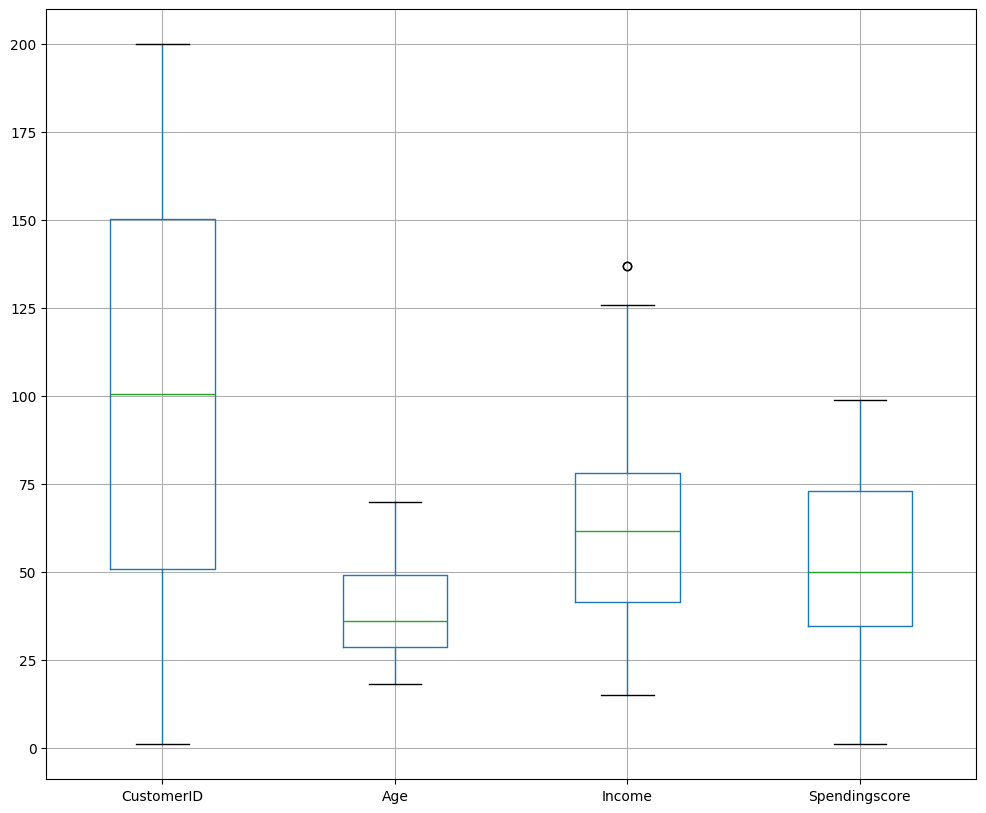

In [17]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(12,10))
plt.show()

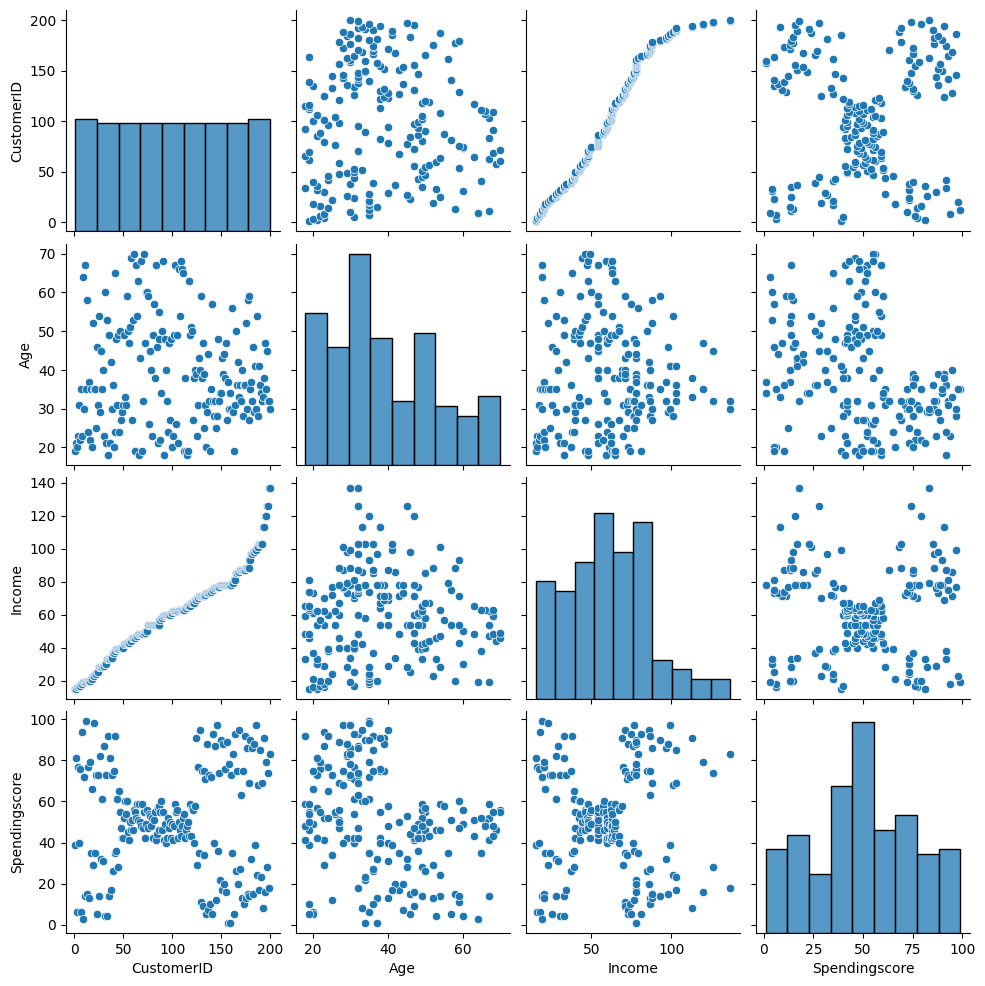

In [19]:
import seaborn as sns

sns.pairplot(df)

In [20]:
size=df['Gender'].value_counts()
size

,count
Gender,
Female,112
Male,88


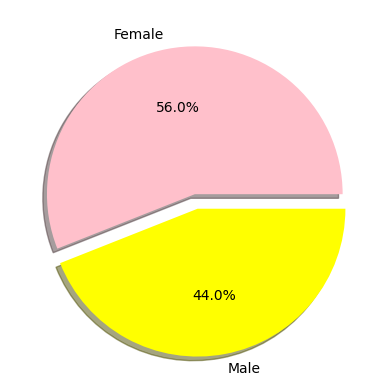

In [22]:
label=['Female','Male']
z=[0,0.1]
color=['pink','yellow']
plt.pie(size,explode=z,labels=label, colors=color,shadow=True,autopct='%1.1f%%')
plt.show()

In [24]:
x=df.loc[:,['Income','Spendingscore']]
x

,Income,Spendingscore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [25]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
db

DBSCAN(eps=3, min_samples=4)

In [27]:
model=db.fit(x)
model

DBSCAN(eps=3, min_samples=4)

In [34]:
label=model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [35]:
from sklearn import metrics

sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
#sample_cores[db.core_sample_indices_]=True   :  Noise will be removed

In [40]:
n_clusters=len(set(label))-(1 if -1 in label else 0)
print("Number of clusters",n_clusters)

# -1 are the noise which are  removed

Number of clusters 9


In [41]:
y_means=db.fit_predict(x)

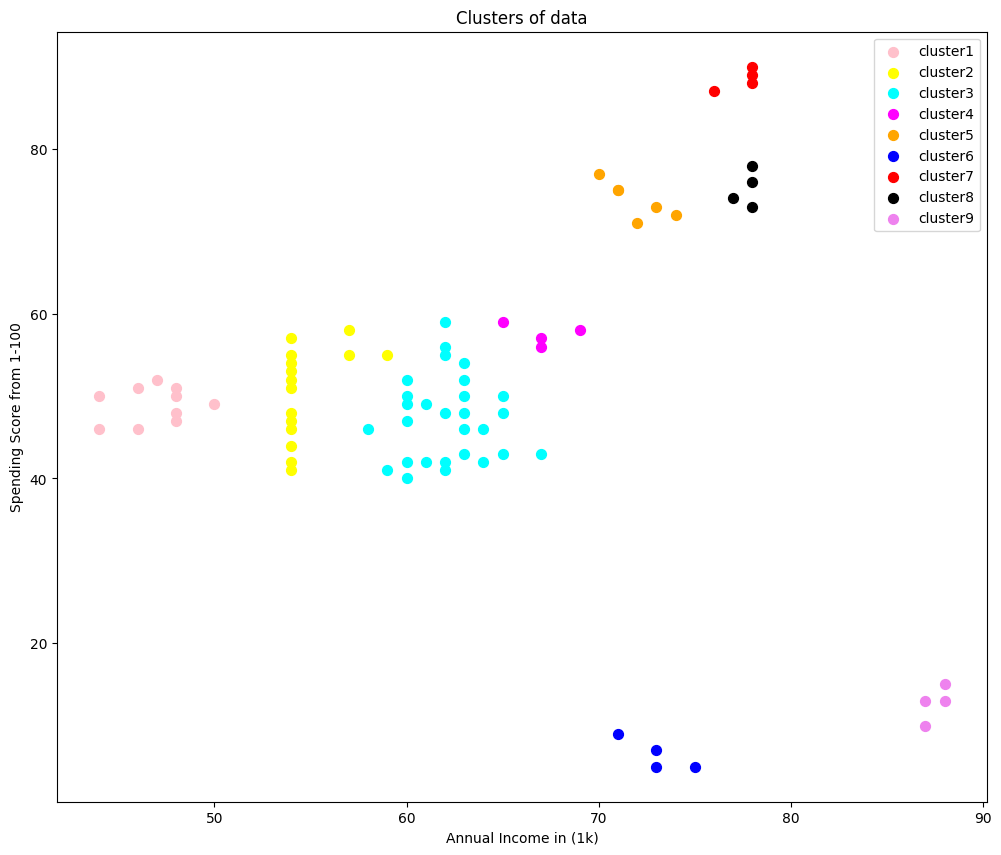

In [46]:
plt.figure(figsize=(12,10))
plt.scatter(x.loc[y_means == 0, 'Income'], x.loc[y_means == 0, 'Spendingscore'], s = 50, c = 'pink',label="cluster1")
plt.scatter(x.loc[y_means == 1, 'Income'], x.loc[y_means == 1, 'Spendingscore'], s = 50, c = 'yellow',label="cluster2")
plt.scatter(x.loc[y_means == 2, 'Income'], x.loc[y_means == 2, 'Spendingscore'], s = 50, c = 'cyan',label="cluster3")
plt.scatter(x.loc[y_means == 3, 'Income'], x.loc[y_means == 3, 'Spendingscore'], s = 50, c = 'magenta',label="cluster4")
plt.scatter(x.loc[y_means == 4, 'Income'], x.loc[y_means == 4, 'Spendingscore'], s = 50, c = 'orange',label="cluster5")
plt.scatter(x.loc[y_means == 5, 'Income'], x.loc[y_means == 5, 'Spendingscore'], s = 50, c = 'blue',label="cluster6")
plt.scatter(x.loc[y_means == 6, 'Income'], x.loc[y_means == 6, 'Spendingscore'], s = 50, c = 'red',label="cluster7")
plt.scatter(x.loc[y_means == 7, 'Income'], x.loc[y_means == 7, 'Spendingscore'], s = 50, c = 'black',label="cluster8")
plt.scatter(x.loc[y_means == 8, 'Income'], x.loc[y_means == 8, 'Spendingscore'], s = 50, c = 'violet',label="cluster9")
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.legend()
plt.show()

In [48]:
from sklearn import metrics
print(metrics.silhouette_score(x,label))
# Infer : there is lot of overlapping

-0.1908319132560097


In [49]:
# A score more than 0.5 indices a high quality clusters
# A score , ie. negative there is overlapping

In [50]:
# +1 : perfect clustering
# Overlapping
# -1 : wrong clusters